## Expense Processing Dynamics Analysis (Flag 25)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To analyze and understand how the cost of an expense influences its processing time, aiming to improve the efficiency and fairness of expense report processing across all cost brackets.

**Role**: Financial Operations Analyst

**Difficulty**: 2 out of 5. This analysis requires intensive scrutiny of processing times against expense amounts, demanding high-level data manipulation and analytical skills to identify effective operational practices that can be applied universally.

**Category**: Finance Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the expense dataset to be analyzed. The data is assumed to be in the from a CSV file, and needs to be loaded into a DataFrame. The steps usually involve specifying the path to the dataset, using pandas to read the file into the dataframe, and verifying at the end by inspecting the first few table entries.

In [2]:
dataset_path = "csvs/flag-25.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,amount,department,type,state,source_id,processed_date,number,opened_at,user,category,short_description,ci
0,4847,Customer Support,NaN,Processed,JPQ-84611536,2024-04-10 09:16:00,EXP00000000,2024-03-26 09:16:00,Valerie Pou,Assets,Oracle database system server,Oracle-Server-231
1,1305,Sales,NaN,Processed,AJB-64072076,2023-12-07 01:38:00,EXP00000001,2023-11-08 01:38:00,Howard Johnson,Services,Automated service line for creating new asset,ServiceNow Cloud Services
2,1508,Customer Support,NaN,Processed,VLM-63219520,2024-03-28 04:23:00,EXP00000002,2024-02-29 04:23:00,Owen Sparacino,Services,Service-related hardware asset generation,Cloud Server
3,7134,Customer Support,NaN,Processed,NaN,2023-11-23 04:33:00,EXP00000003,2023-11-16 04:33:00,Danny Dales,Travel,Automatically generated expense line for creat...,Business Class Flight Tickets
4,5637,Customer Support,NaN,Processed,NaN,2023-05-12 05:12:00,EXP00000004,2023-04-29 05:12:00,Ofelia Sheffler,Travel,Travel related asset expense generation,Toshiba Satellite Pro


### **Question 1: Is there a statistically significant correlation between the cost of an expense and its processing time?**

#### Plot any correlation between processing time and expense amount analysis.

This cell provides a scatter plot analysis showing the relationship between the expense amount and the processing time of expense claims. Each point on the graph represents an expense claim, plotted to reflect its amount against the number of days it took to process. The goal is to identify if higher expenses are processed faster or slower compared to lower-valued claims, shedding light on operational efficiencies or discrepancies in handling expenses.


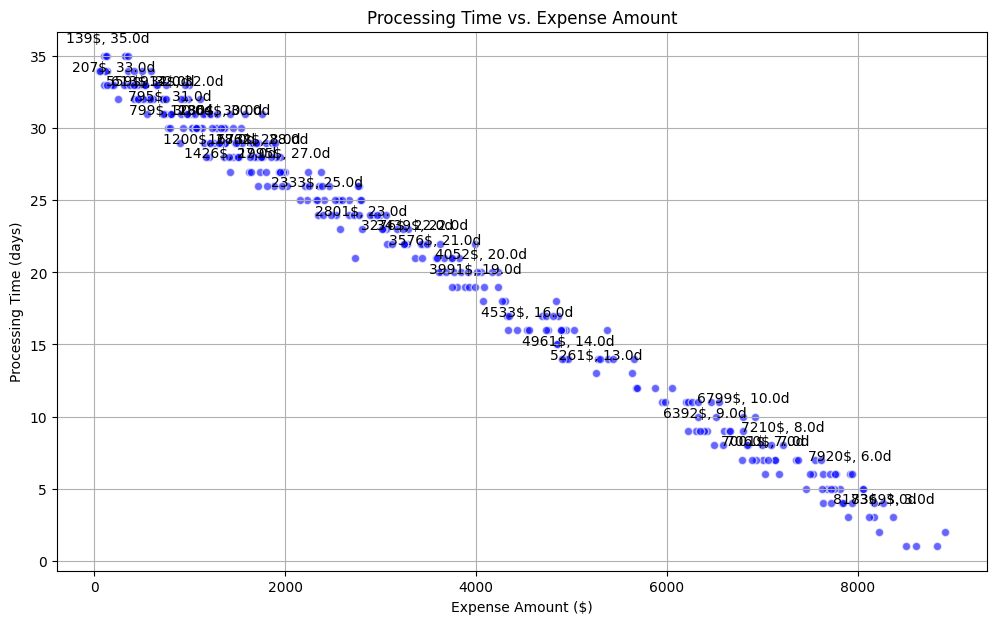

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is the DataFrame containing your data
flag_data['opened_at'] = pd.to_datetime(flag_data['opened_at'])
flag_data["processed_date"] = pd.to_datetime(flag_data["processed_date"])
# Calculate the difference in days between 'opened_at' and 'process_date'
flag_data['processing_time'] = (flag_data['processed_date'] - flag_data['opened_at']).dt.days

# Create a scatter plot of amount vs. processing time
plt.figure(figsize=(12, 7))
plt.scatter(flag_data['amount'], flag_data['processing_time'], alpha=0.6, edgecolors='w', color='blue')
plt.title('Processing Time vs. Expense Amount')
plt.xlabel('Expense Amount ($)')
plt.ylabel('Processing Time (days)')
plt.grid(True)

# Annotate some points with amount and processing time for clarity
for i, point in flag_data.sample(n=50).iterrows():  # Randomly sample points to annotate to avoid clutter
    plt.annotate(f"{point['amount']}$, {point['processing_time']}d", 
                 (point['amount'], point['processing_time']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "diagnostic",
    "insight": "There is a correlation between expense amount and processing time, lower-cost expenses are processed slower than higher-cost ones",
    "insight_value": {
        "description": "Contrary to typical expectations, lower-cost expenses are processed slower than higher-cost ones, indicating that expense amount significantly influences processing efficiency and disproportionately favors higher-cost expenses."
    },
    "plot": {
        "plot_type": "scatter",
        "title": "Processing Time vs. Expense Amount",
        "x_axis": {
            "name": "Expense Amount ($)",
            "value": "Continuously variable amounts",
            "description": "This axis represents different expense amounts submitted for processing."
        },
        "y_axis": {
            "name": "Processing Time (days)",
            "value": "Number of days taken to process each expense",
            "description": "This axis displays the processing time in days, highlighting an unexpected trend where lower-cost expenses take longer to process than those with higher costs."
        },
        "description": "The scatter plot reveals an intriguing trend: expenses with lower costs are processed more slowly than those with higher costs. This unexpected pattern suggests that lower expenses may not be prioritized or are subject to less efficient processing procedures compared to higher expenses, which might be fast-tracked through the approval process."
    },
    "question": "Is there a statistically significant correlation between the cost of an expense and its processing time?",
    "actionable_insight": {
        "description": "In light of the reverse correlation observed, it is advisable for the organization to reassess its processing protocols for lower-cost expenses. Streamlining the processing procedures for these expenses could enhance efficiency and ensure a more equitable handling of all financial transactions, regardless of their size. This might involve simplifying approval steps for smaller amounts or implementing automated systems that can quickly handle routine, low-cost submissions. Such strategic changes would ensure that lower-cost expenses are not unnecessarily delayed, thereby optimizing the expense management process and improving overall operational efficiency."
    }
}


{'data_type': 'diagnostic',
 'insight': 'There is a correlation between expense amount and processing time, lower-cost expenses are processed slower than higher-cost ones',
 'insight_value': {'description': 'Contrary to typical expectations, lower-cost expenses are processed slower than higher-cost ones, indicating that expense amount significantly influences processing efficiency and disproportionately favors higher-cost expenses.'},
 'plot': {'plot_type': 'scatter',
  'title': 'Processing Time vs. Expense Amount',
  'x_axis': {'name': 'Expense Amount ($)',
   'value': 'Continuously variable amounts',
   'description': 'This axis represents different expense amounts submitted for processing.'},
  'y_axis': {'name': 'Processing Time (days)',
   'value': 'Number of days taken to process each expense',
   'description': 'This axis displays the processing time in days, highlighting an unexpected trend where lower-cost expenses take longer to process than those with higher costs.'},
  'des

### **Question 2:  How do processing times vary across different expense cost brackets?**


#### Plot average processing time by expense amount category

This bar chart displays the average processing times for expense claims across different financial categories. The graph provides a clear view of how processing times differ between lower-cost and higher-cost expenses, highlighting potential operational efficiencies or delays associated with various expense brackets. 


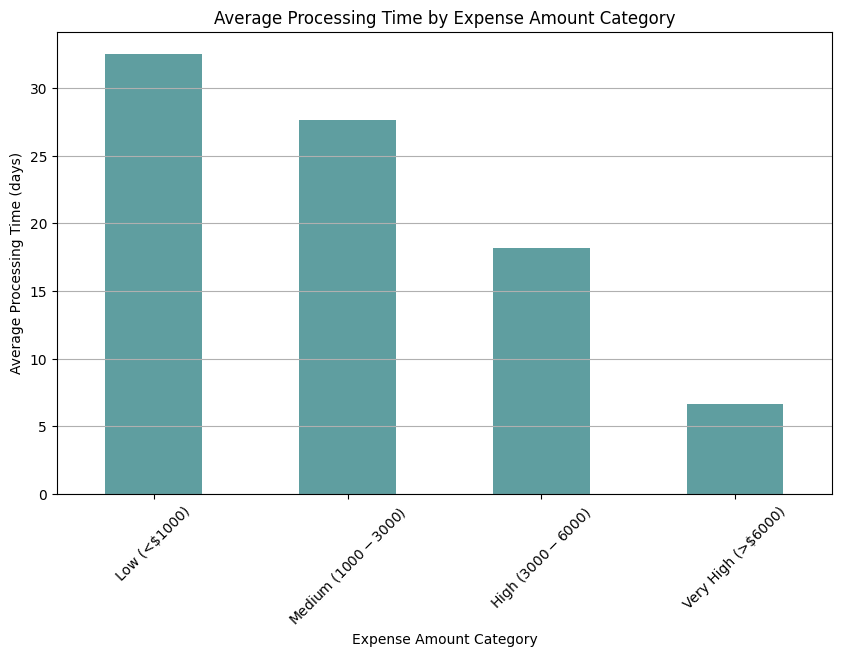

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins for the expense amounts and labels for these bins
bins = [0, 1000, 3000, 6000, 9000]
labels = ['Low (<$1000)', 'Medium ($1000-$3000)', 'High ($3000-$6000)', 'Very High (>$6000)']
flag_data['amount_category'] = pd.cut(flag_data['amount'], bins=bins, labels=labels, right=False)

# Calculate the average processing time for each category
average_processing_time = flag_data.groupby('amount_category')['processing_time'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
average_processing_time.plot(kind='bar', color='cadetblue')
plt.title('Average Processing Time by Expense Amount Category')
plt.xlabel('Expense Amount Category')
plt.ylabel('Average Processing Time (days)')
plt.xticks(rotation=45)  # Rotate labels to fit them better
plt.grid(True, axis='y')

# Show the plot
plt.show()


#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "Expenses within lower cost brackets experience significantly longer processing times, with the longest delays occurring in the lowest bracket.",
    "insight_value": {
        "description": "Contrary to what might be expected, expenses within lower cost brackets experience significantly longer processing times, with the longest delays occurring in the lowest bracket."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by Expense Cost Bracket",
        "x_axis": {
            "name": "Expense Cost Bracket",
            "value": ["<$1000", "$1000-$3000", "$3000-$6000", ">$6000"],
            "description": "This axis categorizes expenses into four distinct cost brackets, ranging from less than $1000 to over $6000."
        },
        "y_axis": {
            "name": "Average Processing Time (days)",
            "value": {
                "<$1000": "32.5 days",
                "$1000-$3000": "27.5 days",
                "$3000-$6000": "17 days",
                ">$6000": "6 days"
            },
            "description": "This axis displays the average processing time in days for each cost bracket, clearly showing a decrease in processing time as expense amounts rise, which is an unusual trend where lower-cost expenses are processed more slowly."
        },
        "description": "The bar chart vividly illustrates the reverse relationship between expense amounts and their processing times. It is evident that lower expense amounts take disproportionately longer to process compared to higher amounts, with the lowest expense bracket (< $1000) averaging 32.5 days, which is significantly longer compared to other, higher brackets."
    },
    "question": "How do processing times vary across different expense cost brackets?",
    "actionable_insight": {
        "description": "To address this counterintuitive trend and improve efficiency across all expense brackets, the organization should consider revising the processing workflows for lower-cost expenses. Simplifying the approval processes for these expenses, potentially by automating certain checks or reducing bureaucratic steps, could significantly reduce processing times. This adjustment will help ensure a more consistent processing timeframe across all expense categories, promoting a balanced workflow and reducing potential bottlenecks that disproportionately impact smaller transactions."
    }
}


{'data_type': 'descriptive',
 'insight': 'Expenses within lower cost brackets experience significantly longer processing times, with the longest delays occurring in the lowest bracket.',
 'insight_value': {'description': 'Contrary to what might be expected, expenses within lower cost brackets experience significantly longer processing times, with the longest delays occurring in the lowest bracket.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Expense Cost Bracket',
  'x_axis': {'name': 'Expense Cost Bracket',
   'value': ['<$1000', '$1000-$3000', '$3000-$6000', '>$6000'],
   'description': 'This axis categorizes expenses into four distinct cost brackets, ranging from less than $1000 to over $6000.'},
  'y_axis': {'name': 'Average Processing Time (days)',
   'value': {'<$1000': '32.5 days',
    '$1000-$3000': '27.5 days',
    '$3000-$6000': '17 days',
    '>$6000': '6 days'},
   'description': 'This axis displays the average processing time in days for each cos

### **Question 3:  How do processing times vary across different expense cost brackets?**

#### Distribution of Expense Amounts by State

This stacked bar chart visualizes the distribution of expense claims across different cost brackets and their respective states (such as approved, declined, pending). Each bar represents a unique expense bracket, with colors indicating the state of the expense. This visualization helps to identify patterns and trends in how different expense amounts are processed etc.


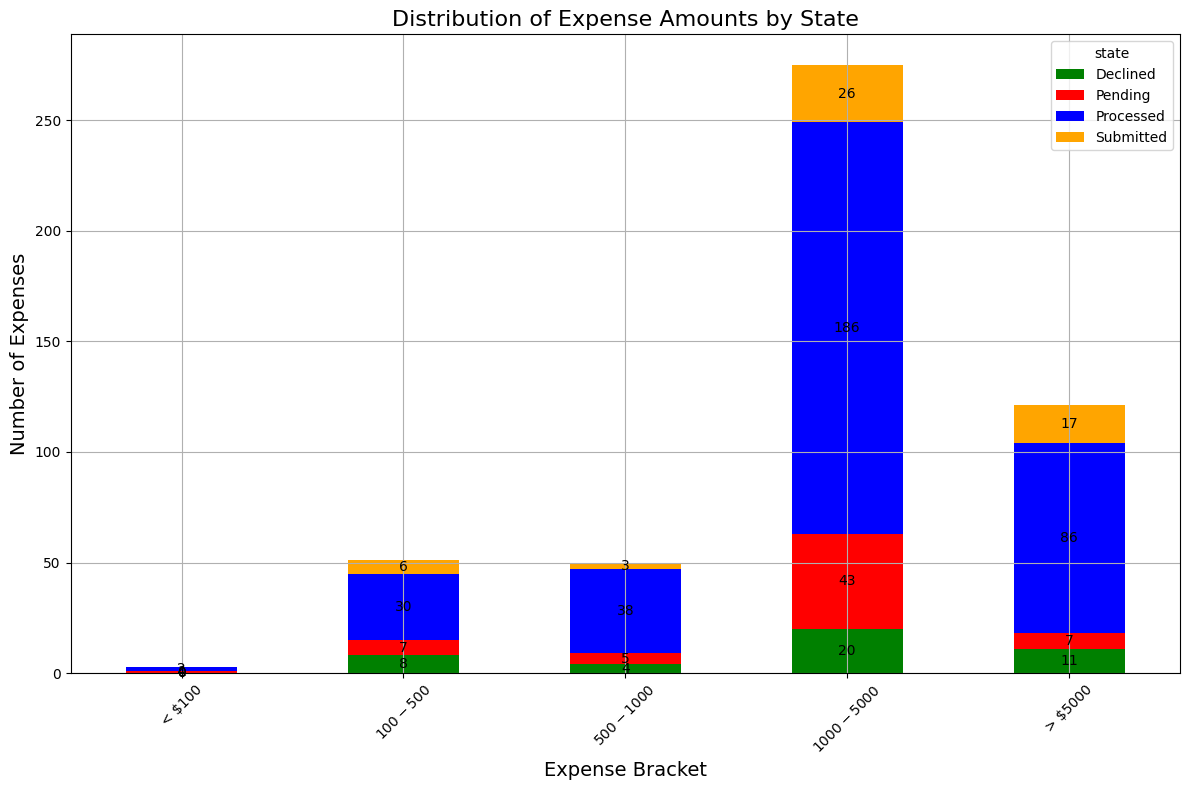

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the expense report data
# Calculate the frequency of different states for each expense amount range
expense_brackets = [0, 100, 500, 1000, 5000, np.inf]
labels = ['< $100', '$100 - $500', '$500 - $1000', '$1000 - $5000', '> $5000']
df['expense_bracket'] = pd.cut(df['amount'], bins=expense_brackets, labels=labels, right=False)

# Group by expense bracket and state, then count occurrences
state_distribution = df.groupby(['expense_bracket', 'state']).size().unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = state_distribution.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red', 'blue', 'orange'])

ax.set_title('Distribution of Expense Amounts by State', fontsize=16)
ax.set_xlabel('Expense Bracket', fontsize=14)
ax.set_ylabel('Number of Expenses', fontsize=14)
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Add number labels on top of each bar
for bar in bars.containers:
    ax.bar_label(bar, label_type='center')

plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "There is varied processing outcomes across expense brackets",
    "insight_value": {
        "description": "Expenses within brackets (1000$ - 5000$) encounter a higher volume of transactions and typically higher brackets experience a lower number of pending statuses compared to lower brackets."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Detailed Distribution of Expense Processing Outcomes by Cost Bracket",
        "x_axis": {
            "name": "Expense Bracket",
            "value": ["$100-$500", "$500-$1000", "$1000-$5000", ">$5000"],
            "description": "Categorizes expenses into four distinct brackets based on amount."
        },
        "y_axis": {
            "name": "Number of Expenses",
            "value": {
                "$100-$500": {"Declined": "8", "Pending": "7", "Processed": "30"},
                "$500-$1000": {"Declined": "4", "Pending": "5", "Processed": "38"},
                "$1000-$5000": {"Declined": "20", "Pending": "43", "Processed": "186"},
                ">$5000": {"Declined": "11", "Pending": "7", "Processed": "86"}
            },
            "description": "Displays the count of expenses in each state (Declined, Pending, Processed) for each cost bracket, revealing trends in how financial magnitude influences processing outcomes."
        },
        "description": "The bar chart provides a detailed view of expense report outcomes within various cost brackets, illustrating how lower expense amounts correlate with not only more transactions but also a higher likelihood of encountering delays."
    },
    "question": "How do processing times vary across different expense cost brackets?",
    "actionable_insight": {
        "description": "The disproportionate number of declines and pending statuses in lower expense brackets suggests a need for slight refining the approval workflows for lower amounts. Organizations could benefit from automating certain aspects of the approval process for high-cost transactions to allocate more resources towards efficiently managing lower-cost expenses too, although more weightage and care should be for higher amount expenses. Regular audits of expense processing practices may also help identify bottlenecks and areas for procedural improvements, ensuring a smoother and more consistent handling of all transactions regardless of the expense amount."
    }
}


{'data_type': 'descriptive',
 'insight': 'There is varied processing outcomes across expense brackets',
 'insight_value': {'description': 'Expenses within brackets (1000$ - 5000$) encounter a higher volume of transactions and typically higher brackets experience a lower number of pending statuses compared to lower brackets.'},
 'plot': {'plot_type': 'bar',
  'title': 'Detailed Distribution of Expense Processing Outcomes by Cost Bracket',
  'x_axis': {'name': 'Expense Bracket',
   'value': ['$100-$500', '$500-$1000', '$1000-$5000', '>$5000'],
   'description': 'Categorizes expenses into four distinct brackets based on amount.'},
  'y_axis': {'name': 'Number of Expenses',
   'value': {'$100-$500': {'Declined': '8', 'Pending': '7', 'Processed': '30'},
    '$500-$1000': {'Declined': '4', 'Pending': '5', 'Processed': '38'},
    '$1000-$5000': {'Declined': '20', 'Pending': '43', 'Processed': '186'},
    '>$5000': {'Declined': '11', 'Pending': '7', 'Processed': '86'}},
   'description': 'Disp

### **Question 4: Is there any particular user or department that has high processing time in the low bracket, or is it uniform more or less?**


#### Plot average processing time for Low-cost expenses by department and user

This visualization consists of two subplots displaying the average processing times for expenses under $1000 by department and user. The top bar chart shows the average days it takes for each department to process these low-cost expenses, highlighting potential variations or efficiencies in departmental processing practices. The bottom bar chart details the processing times attributed to individual users, identifying specific users who may require additional training or adjustments in workflow to enhance processing efficiency for smaller expense amounts.


/tmp/ipykernel_14927/2769589383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cost_expenses['processing_time'] = (pd.to_datetime(high_cost_expenses['processed_date']) - pd.to_datetime(high_cost_expenses['opened_at'])).dt.days


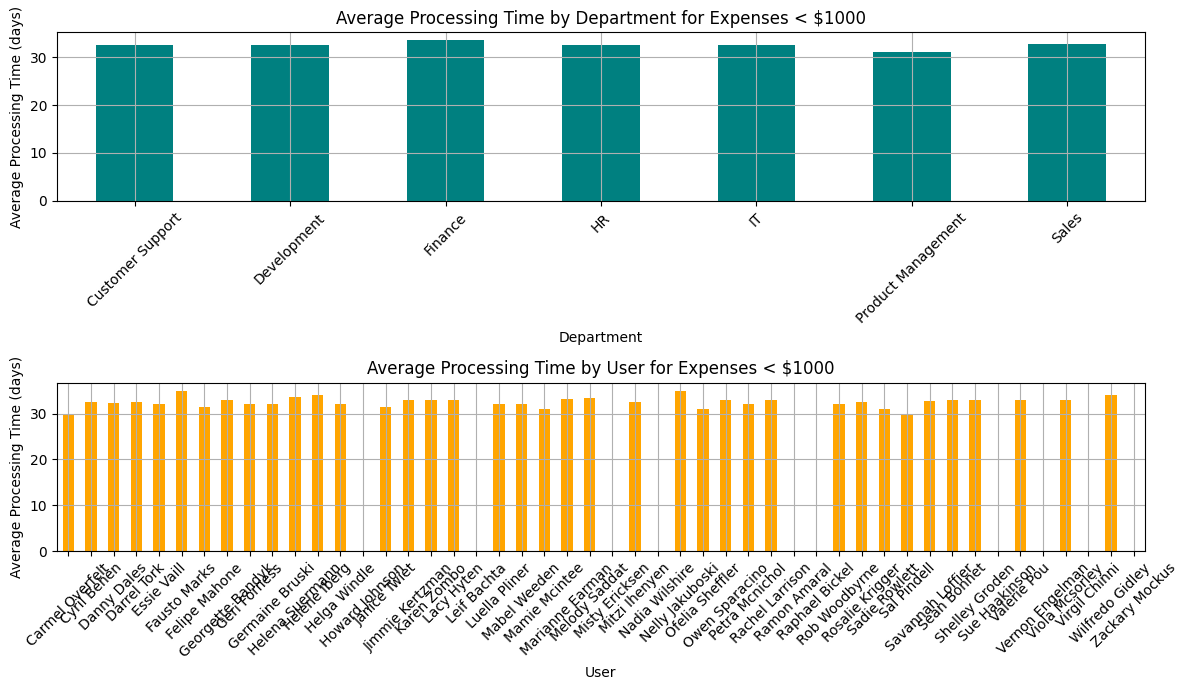

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the expense report data
# Filter for expenses greater than $5000
high_cost_expenses = df[df['amount'] < 1000]

# Calculate processing time in days
high_cost_expenses['processing_time'] = (pd.to_datetime(high_cost_expenses['processed_date']) - pd.to_datetime(high_cost_expenses['opened_at'])).dt.days

# Plot for Departments
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
department_processing = high_cost_expenses.groupby('department')['processing_time'].mean()
department_processing.plot(kind='bar', color='teal')
plt.title('Average Processing Time by Department for Expenses < $1000')
plt.ylabel('Average Processing Time (days)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.grid(True)

# Plot for Users
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
user_processing = high_cost_expenses.groupby('user')['processing_time'].mean()
user_processing.plot(kind='bar', color='orange')
plt.title('Average Processing Time by User for Expenses < $1000')
plt.ylabel('Average Processing Time (days)')
plt.xlabel('User')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "descriptive",
    "insight": "Processing times are uniform across users and departments for lower-cost expenses",
    "insight_value": {
        "description": "The processing time for lower-cost expenses (<$1000) shows a uniform trend across different users and departments, indicating that delays or efficiencies are generally related to the amount involved rather than specific departmental or individual user practices."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by Department and User for Expenses less that $1000",
        "x_axis": {
            "name": "Department/User",
            "value": "Mixed categories including various departments and users",
            "description": "This axis represents both departments and individual users, categorized to show their respective processing times for lower-cost expenses."
        },
        "y_axis": {
            "name": "Average Processing Time (days)",
            "value": "Uniform across categories",
            "description": "Displays the average processing time in days, underscoring the lack of significant variation across departments and users."
        },
        "description": "The bar charts, segmented by department and user, illustrate that processing times for expenses under $1000 are uniformly distributed. This suggests that the lower cost of these expenses inherently requires a consistent processing approach across the organization, likely due to the need for thorough review and approval processes that are standard regardless of the department or user."
    },
    "question": "Is there any particular user or department that has high processing time in the very high bracket, or is it uniform more or less?",
    "actionable_insight": {
        "description": "Given that the trend of processing times is generally uniform and related to the lower expense amounts, efforts to streamline or expedite processing should focus on improving the overall efficiency of handling low-cost expenses. This could involve reviewing and potentially simplifying the steps required for approving any expenditures, ensuring that such procedures are efficient yet robust enough to maintain financial control."
    }
}

{'data_type': 'descriptive',
 'insight': 'Processing times are uniform across users and departments for lower-cost expenses',
 'insight_value': {'description': 'The processing time for lower-cost expenses (<$1000) shows a uniform trend across different users and departments, indicating that delays or efficiencies are generally related to the amount involved rather than specific departmental or individual user practices.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Department and User for Expenses less that $1000',
  'x_axis': {'name': 'Department/User',
   'value': 'Mixed categories including various departments and users',
   'description': 'This axis represents both departments and individual users, categorized to show their respective processing times for lower-cost expenses.'},
  'y_axis': {'name': 'Average Processing Time (days)',
   'value': 'Uniform across categories',
   'description': 'Displays the average processing time in days, underscoring the la

### Summary of Findings (Flag 25):


1. **Cost vs. Efficiency**: This dataset scrutinizes the unconventional trend where higher-cost expenses are processed more rapidly than lower-cost ones, challenging typical operational expectations. The analysis seeks to uncover whether specific prioritization policies or operational efficiencies are influencing these patterns.
   
2. **Processing Trends Across Brackets**: The dataset reveals that expenses within the middle brackets ($1000-$5000) experience higher transaction volumes, with higher brackets generally encountering fewer pending statuses. This suggests that the expense amount significantly impacts processing dynamics.
   
3. **Uniformity Across Users and Departments**: The analysis demonstrates that the processing time for lower-cost expenses (under $1000) displays a uniform trend across various users and departments. This indicates that delays or efficiencies are predominantly associated with the expense amount rather than specific departmental or individual practices.